In [1]:
#!pip install ultralytics
#!pip install easyocr

In [2]:
import sys
print(sys.version)

3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]


In [3]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [6]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("C:\\Users\\HLC\\Desktop\\biensoxe2.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

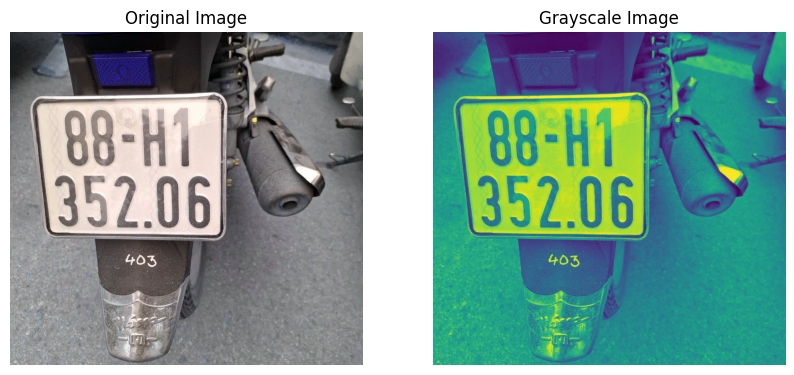

In [7]:
# B2 Hi·ªÉn th·ªã ·∫£nh g·ªëc v√† ·∫£nh grayscale s·ª≠ d·ª•ng matplotlib
plt.figure(figsize=(10, 5))
# Hi·ªÉn th·ªã ·∫£nh g·ªëc
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')  # T·∫Øt tr·ª•c t·ªça ƒë·ªô
# Hi·ªÉn th·ªã ·∫£nh grayscale
plt.subplot(1, 2, 2)
plt.imshow(gray_image)
plt.title("Grayscale Image")
plt.axis('off')  # T·∫Øt tr·ª•c t·ªça ƒë·ªô
plt.show()

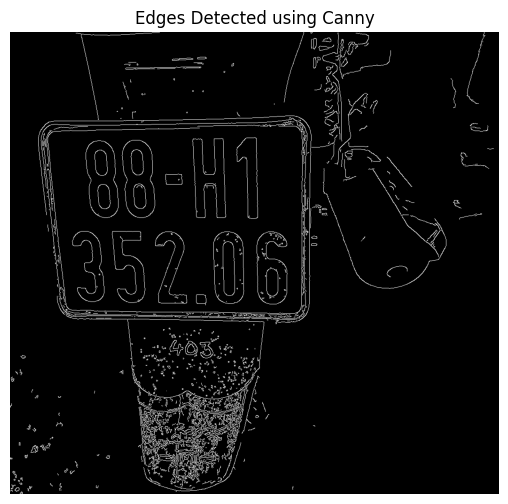

In [8]:
edges = cv2.Canny(gray_image, 100, 200)
# Hi·ªÉn th·ªã b·ª©c ·∫£nh v·ªõi matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(edges, cmap='gray')
plt.title('Edges Detected using Canny')
plt.axis('off')  # T·∫Øt tr·ª•c
plt.show()

In [9]:
# B4 Ti·ªÅn x·ª≠ l√Ω v√† chu·∫©n b·ªã c√°c k√Ω t·ª± t·ª´ v√πng bi·ªÉn s·ªë
def extract_characters_from_plate(license_plate_image):
    # Chuy·ªÉn ·∫£nh th√†nh ·∫£nh x√°m
    gray = cv2.cvtColor(license_plate_image, cv2.COLOR_BGR2GRAY)
    
    # √Åp d·ª•ng threshold ƒë·ªÉ ph√¢n t√°ch n·ªÅn v√† c√°c k√Ω t·ª±
    _, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # T√¨m c√°c contours c·ªßa c√°c k√Ω t·ª±
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    character_images = []

    # Duy·ªát qua c√°c contours v√† c·∫Øt c√°c k√Ω t·ª± ra
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # L·ªçc c√°c contours c√≥ di·ªán t√≠ch ƒë·ªß l·ªõn
            x, y, w, h = cv2.boundingRect(contour)
            character_image = thresholded[y:y+h, x:x+w]
            character_images.append(character_image)
    
    return character_images

In [10]:
#bo sung crop 
license_plate_region = image[190:370, 170:410]  # V√≠ d·ª• (thay t·ªça ƒë·ªô theo ·∫£nh b·∫°n)
license_plate_regions = [license_plate_region]

# B5 Ki·ªÉm tra k√≠ch th∆∞·ªõc c·ªßa m·ªói v√πng bi·ªÉn s·ªë c·∫Øt ra
for i, region in enumerate(license_plate_regions):
    print(f"V√πng bi·ªÉn s·ªë {i+1}: {region.shape}")

V√πng bi·ªÉn s·ªë 1: (180, 240, 3)


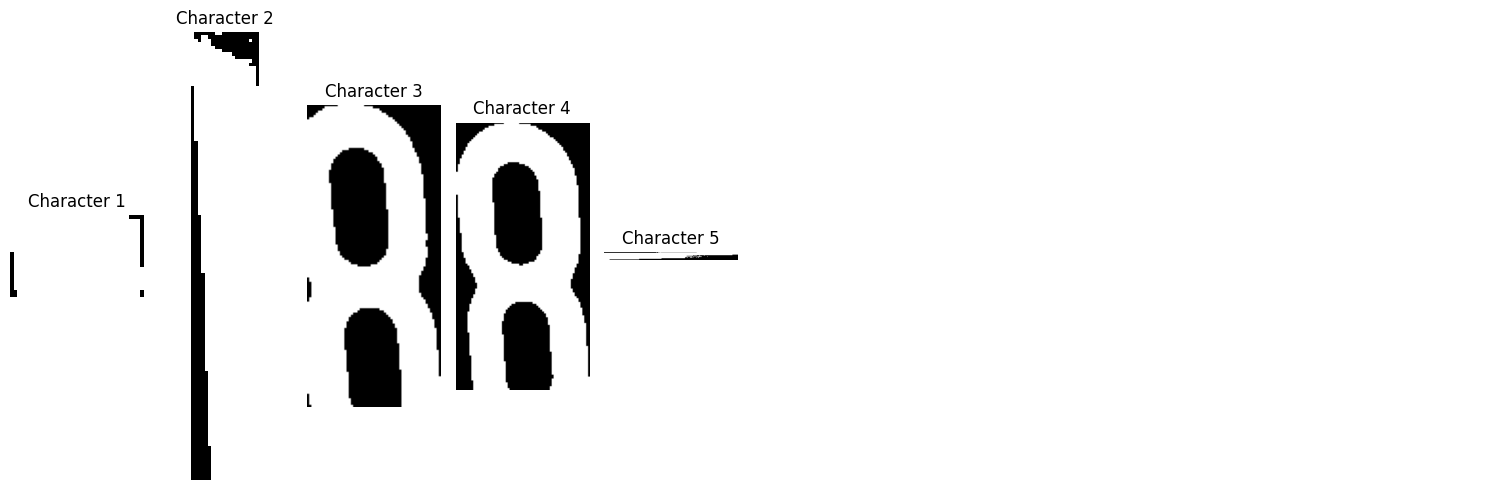

In [11]:
# B6 Ti·∫øn h√†nh c·∫Øt c√°c k√Ω t·ª± t·ª´ m·ªói v√πng bi·ªÉn s·ªë
all_character_images = []
for license_plate_image in license_plate_regions:
    characters = extract_characters_from_plate(license_plate_image)
    all_character_images.extend(characters)

# Hi·ªÉn th·ªã c√°c k√Ω t·ª± ƒë√£ c·∫Øt ra (v√≠ d·ª•: ch·ªâ hi·ªÉn th·ªã 5 k√Ω t·ª± ƒë·∫ßu ti√™n)
fig, axes = plt.subplots(1, 10, figsize=(15, 5))

for i, ax in enumerate(axes):
    if i < len(all_character_images):
        ax.imshow(all_character_images[i], cmap='gray')
        ax.set_title(f"Character {i+1}")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [12]:
#B7
import cv2
import os

# ƒê·∫£m b·∫£o r·∫±ng th∆∞ m·ª•c n∆°i b·∫°n l∆∞u c√°c h√¨nh ·∫£nh t·ªìn t·∫°i
output_dir = 'saved_characters/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# L∆∞u c√°c h√¨nh ·∫£nh trong all_character_images
for i, char_image in enumerate(all_character_images):
    # T·∫°o t√™n file cho m·ªói h√¨nh ·∫£nh (v√≠ d·ª•: "char_0.png", "char_1.png", ...)
    file_name = os.path.join(output_dir, f'char_{i}.png')
    
    # L∆∞u h√¨nh ·∫£nh b·∫±ng cv2
    cv2.imwrite(file_name, char_image)

    print(f"ƒê√£ l∆∞u h√¨nh ·∫£nh: {file_name}")


ƒê√£ l∆∞u h√¨nh ·∫£nh: saved_characters/char_0.png
ƒê√£ l∆∞u h√¨nh ·∫£nh: saved_characters/char_1.png
ƒê√£ l∆∞u h√¨nh ·∫£nh: saved_characters/char_2.png
ƒê√£ l∆∞u h√¨nh ·∫£nh: saved_characters/char_3.png
ƒê√£ l∆∞u h√¨nh ·∫£nh: saved_characters/char_4.png


In [13]:
#B8 T·∫°o t·ª± ƒë·ªông 2 th∆∞ m·ª•c train v√† validation trong dataset
from PIL import Image, ImageDraw, ImageFont
import os

# ƒê∆∞·ªùng d·∫´n ƒë·∫øn th∆∞ m·ª•c d·ªØ li·ªáu
base_dir = 'dataset'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

# C√°c k√Ω t·ª± t·ª´ 0-9 v√† a-z
characters = [str(i) for i in range(10)] + [chr(i) for i in range(97, 123)]

# T·∫°o c√°c th∆∞ m·ª•c cho train v√† validation
for dir_path in [train_dir, val_dir]:
    for char in characters:
        os.makedirs(os.path.join(dir_path, char), exist_ok=True)

# H√†m t·∫°o h√¨nh ·∫£nh ƒë∆°n gi·∫£n cho s·ªë ho·∫∑c ch·ªØ
def create_image_with_text(text, size=(64, 64)):
    # T·∫°o ·∫£nh tr·∫Øng
    image = Image.new('RGB', size, (255, 255, 255))
    draw = ImageDraw.Draw(image)

    # Ch·ªçn ph√¥ng ch·ªØ (c√≥ th·ªÉ thay ph√¥ng ch·ªØ ho·∫∑c k√≠ch th∆∞·ªõc n·∫øu c·∫ßn)
    font = ImageFont.load_default()

    # T√≠nh to√°n k√≠ch th∆∞·ªõc c·ªßa vƒÉn b·∫£n v·ªõi textbbox
    bbox = draw.textbbox((0, 0), text, font=font)
    text_width, text_height = bbox[2] - bbox[0], bbox[3] - bbox[1]

    # T√≠nh to√°n v·ªã tr√≠ ƒë·ªÉ ch·ªØ ·ªü gi·ªØa
    position = ((size[0] - text_width) // 2, (size[1] - text_height) // 2)

    # V·∫Ω ch·ªØ v√†o ·∫£nh
    draw.text(position, text, (0, 0, 0), font=font)

    return image

# T·∫°o c√°c h√¨nh ·∫£nh cho train v√† validation
for char in characters:
    for i in range(100):  # Gi·∫£ s·ª≠ b·∫°n mu·ªën t·∫°o 100 h√¨nh ·∫£nh cho m·ªói k√Ω t·ª±
        # T·∫°o h√¨nh ·∫£nh cho train
        train_image = create_image_with_text(char)
        train_image.save(os.path.join(train_dir, char, f'{char}_{i}.png'))

        # T·∫°o h√¨nh ·∫£nh cho validation (c√≥ th·ªÉ t·∫°o √≠t h√¨nh ·∫£nh h∆°n)
        if i < 20:  # T·∫°o 20 h√¨nh ·∫£nh cho m·ªói k√Ω t·ª± trong th∆∞ m·ª•c validation
            val_image = create_image_with_text(char)
            val_image.save(os.path.join(val_dir, char, f'{char}_{i}.png'))

print("ƒê√£ t·∫°o th∆∞ m·ª•c v√† h√¨nh ·∫£nh cho train v√† validation.")

ƒê√£ t·∫°o th∆∞ m·ª•c v√† h√¨nh ·∫£nh cho train v√† validation.


In [14]:
#B9
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ƒê∆∞·ªùng d·∫´n t·ªõi th∆∞ m·ª•c ch·ª©a d·ªØ li·ªáu
train_dir = 'dataset/train'  # Th∆∞ m·ª•c ch·ª©a d·ªØ li·ªáu hu·∫•n luy·ªán
val_dir = 'dataset/validation'  # Th∆∞ m·ª•c ch·ª©a d·ªØ li·ªáu x√°c th·ª±c

# Kh·ªüi t·∫°o ImageDataGenerator ƒë·ªÉ ti·ªÅn x·ª≠ l√Ω v√† l√†m augmentation cho d·ªØ li·ªáu
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Chu·∫©n h√≥a h√¨nh ·∫£nh
    rotation_range=20,  # Quay ·∫£nh ng·∫´u nhi√™n
    width_shift_range=0.2,  # D·ªãch chuy·ªÉn ·∫£nh ngang
    height_shift_range=0.2,  # D·ªãch chuy·ªÉn ·∫£nh d·ªçc
    shear_range=0.2,  # Bi·∫øn d·∫°ng ·∫£nh
    zoom_range=0.2,  # Ph√≥ng to ·∫£nh
    horizontal_flip=True,  # L·∫≠t ·∫£nh ngang
    fill_mode='nearest'  # Ph∆∞∆°ng ph√°p ƒëi·ªÅn v√πng tr·ªëng
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Ch·ªâ chu·∫©n h√≥a ·∫£nh cho validation

# T·∫°o c√°c b·ªô d·ªØ li·ªáu t·ª´ c√°c th∆∞ m·ª•c
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # ƒê·∫∑t k√≠ch th∆∞·ªõc ·∫£nh ƒë·∫ßu v√†o (c√≥ th·ªÉ ƒëi·ªÅu ch·ªânh)
    batch_size=32,
    class_mode='sparse'  # D√πng sparse cho c√°c nh√£n d·∫°ng s·ªë nguy√™n (0, 1, 2, ...)
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='sparse'
)

# X√¢y d·ª±ng m√¥ h√¨nh CNN (ho·∫∑c m√¥ h√¨nh c·ªßa b·∫°n)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(37, activation='softmax')  # S·ªë l·ªõp ƒë·∫ßu ra t∆∞∆°ng ·ª©ng v·ªõi c√°c nh√£n (0-9)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Hu·∫•n luy·ªán m√¥ h√¨nh
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Found 3600 images belonging to 36 classes.
Found 720 images belonging to 36 classes.


C:\Users\HLC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\HLC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
112/112 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14s 109ms/step - accuracy: 0.0256 - loss: 3.6401 - val_accuracy: 0.0270 - val_loss: 3.5995
Epoch 2/10
  1/112 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 55ms/step - accuracy: 0.0312 - loss: 3.6127

C:\Users\HLC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


112/112 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 5ms/step - accuracy: 0.0312 - loss: 3.6127 - val_accuracy: 0.0284 - val_loss: 3.6005
Epoch 3/10
112/112 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 105ms/step - accuracy: 0.0281 - loss: 3.6022 - val_accuracy: 0.0256 - val_loss: 3.5945
Epoch 4/10
112/112 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step - accuracy: 0.0000e+00 - loss: 3.5630 - val_accuracy: 0.0284 - val_loss: 3.5947
Epoch 5/10
112/112 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 106ms/step - accuracy: 0.0264 - loss: 3.5916 - val_accuracy: 0.0284 - val_loss: 3.5857
Epoch 6/10
112/112 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 5ms/step - accuracy: 0.0312 - loss: 3.5820 - val_accuracy: 0.0270 - val_loss: 3.5875
Epoch 7/10
112/112 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 104ms/step - accuracy: 0.0225 - loss: 3.5868 - val_accuracy: 0.0284 - val_los

In [15]:
import cv2
import matplotlib.pyplot as plt
import easyocr

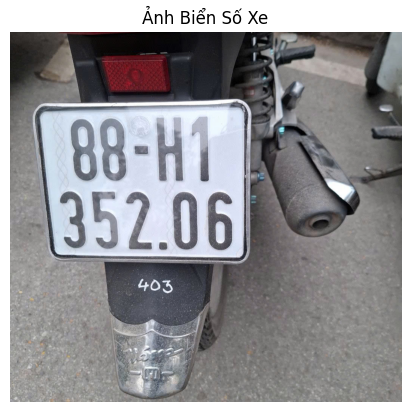

In [16]:
image_path = "C:\\Users\\HLC\\Desktop\\biensoxe2.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title('·∫¢nh Bi·ªÉn S·ªë Xe')
plt.axis('off')
plt.show()

In [17]:
reader = easyocr.Reader(['en', 'vi'])  # H·ªó tr·ª£ c·∫£ ti·∫øng Vi·ªát v√† ti·∫øng Anh
results = reader.readtext(image_path)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [18]:
print("üìå K·∫øt qu·∫£ nh·∫≠n di·ªán bi·ªÉn s·ªë xe:")
for (bbox, text, confidence) in results:
    print(f"üöò Bi·ªÉn s·ªë: {text} | üéØ ƒê·ªô ch√≠nh x√°c: {confidence * 100:.2f}%")

üìå K·∫øt qu·∫£ nh·∫≠n di·ªán bi·ªÉn s·ªë xe:
üöò Bi·ªÉn s·ªë: 88-H1 | üéØ ƒê·ªô ch√≠nh x√°c: 89.47%
üöò Bi·ªÉn s·ªë: 352.06 | üéØ ƒê·ªô ch√≠nh x√°c: 88.74%
üöò Bi·ªÉn s·ªë: 403 | üéØ ƒê·ªô ch√≠nh x√°c: 99.96%


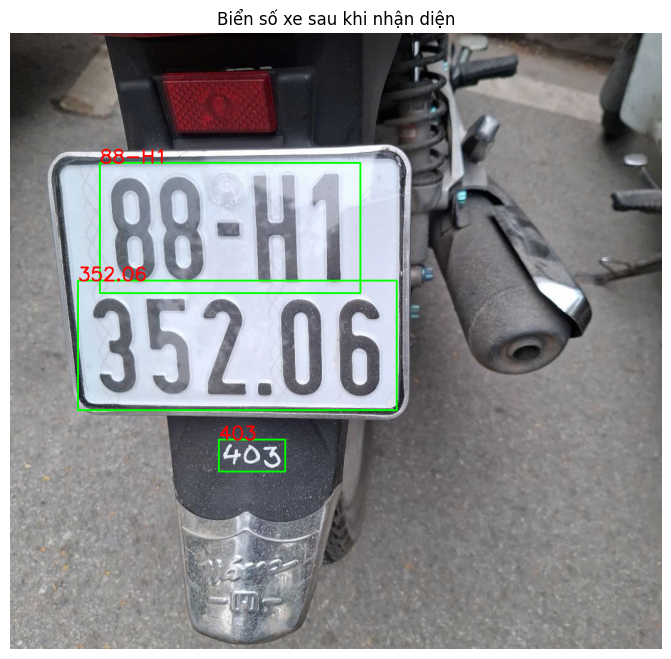

In [19]:
for (bbox, text, confidence) in results:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))
    
    cv2.rectangle(image_rgb, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(image_rgb, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)

plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Bi·ªÉn s·ªë xe sau khi nh·∫≠n di·ªán')
plt.show()